In [36]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("../output_data/output_data.csv")

In [37]:
data = data.rename(columns={'0': 'Transcript_ID', '1': 'Position',"2":"Base_seq","3":"Sample_reads"})

In [38]:
data_info = pd.read_csv("../data.info")

# Outlier Detection

In [4]:
#This is for future exploration after the intermediate submission

# Compiling the sample reads into mean and standard deviation

In [50]:
# Mean and std
def feature_engin1(rows):
    sample_reads = json.loads(rows["Sample_reads"])
    output = {"Mean":[],"Standard_deviation":[]}
    matrix = np.array(sample_reads)
    column_means = np.mean(matrix, axis=0)
    column_std = np.std(matrix,axis=0)
    output = [list(column_means),list(column_std)]
    return output

In [65]:
# Merging the data_info and data together
data["Compiled_reads"] = data.apply(feature_engin1,axis=1)
data_info = data_info.rename(columns={'transcript_id': 'Transcript_ID',"transcript_position":"Position"})
merged_right = pd.merge(data_info, data, on=['Transcript_ID',"Position"], how='right')

In [73]:
# Splitting the compiled reads into separate columns
new_columns = merged_right['Compiled_reads'].apply(pd.Series).apply(pd.Series)
new_columns = pd.concat([new_columns[0].apply(pd.Series), new_columns[1].apply(pd.Series)], axis = 1)
new_columns.columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6', 'mean7', 'mean8', 'mean9',
              'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9']

In [77]:
merged_right_processed = pd.concat([merged_right,new_columns],axis = 1)
merged_right_processed = merged_right_processed.drop(columns = ["Sample_reads","Compiled_reads"])
merged_right_processed.head()

,gene_id,Transcript_ID,Position,label,Base_seq,mean1,mean2,mean3,mean4,mean5,...,mean9,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9
0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,...,80.570270,0.005384,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168
1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,...,94.290698,0.003588,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530
2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,...,89.364324,0.004444,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341
3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,...,89.154000,0.006121,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937
4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,...,85.178788,0.007151,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045


# Train test split

In [80]:
gene_ids = list(set(merged_right_processed.gene_id))
train,test = train_test_split(gene_ids,test_size=0.3,random_state = 40)
train_data = merged_right_processed[merged_right_processed["gene_id"].isin(train)]
test_data = merged_right_processed[merged_right_processed["gene_id"].isin(test)]

,gene_id,Transcript_ID,Position,label,Base_seq,mean1,mean2,mean3,mean4,mean5,...,mean9,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9
0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,...,80.570270,0.005384,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168
1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,...,94.290698,0.003588,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530
2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,...,89.364324,0.004444,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341
3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,...,89.154000,0.006121,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937
4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,...,85.178788,0.007151,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045


# Principal Component Analysis on training data on the compiled reads features

In [81]:
# Getting all the relevant columns
all_columns = train_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9']]
mean_columns = train_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6',"mean7","mean8","mean9"]]
sd_columns = train_data[['sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6',"sd7","sd8","sd9"]]

In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_columns)
scaled_data_mean = scaler.fit_transform(mean_columns)
scaled_data_sd = scaler.fit_transform(sd_columns)

# Update the n_components here to get how many principal components you want to use
pca_all = PCA(n_components=None)
pca_mean = PCA(n_components=None)
pca_sd = PCA(n_components=None)

# Fit the PCA model
pca_all.fit(scaled_data)
pca_mean.fit(scaled_data_mean)
pca_sd.fit(scaled_data_sd)

# Transform the data
reduced_data_all = pca_all.transform(scaled_data)
reduced_data_mean = pca_mean.transform(scaled_data_mean)
reduced_data_sd = pca_sd.transform(scaled_data_sd)

# Explained variance
explained_variance_all = pca_all.explained_variance_ratio_
explained_variance_mean = pca_mean.explained_variance_ratio_
explained_variance_sd = pca_sd.explained_variance_ratio_


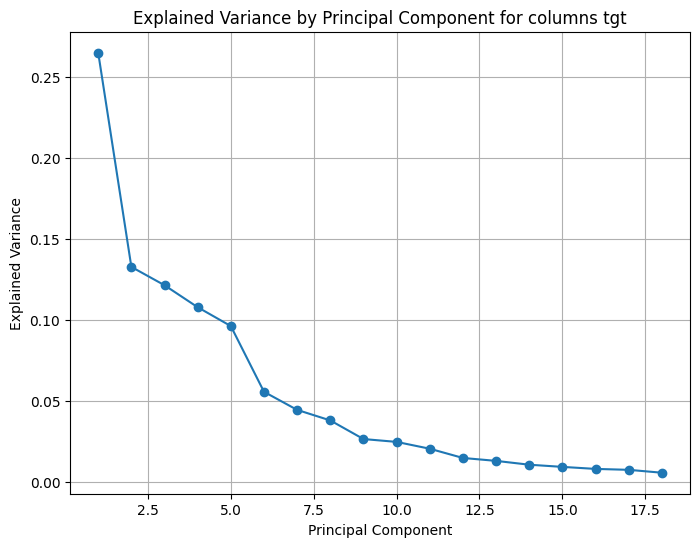

In [83]:
# Choose 6 PCs for tgt based on the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_all) + 1), explained_variance_all, marker='o', linestyle='-')
plt.title('Explained Variance by Principal Component for columns tgt')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

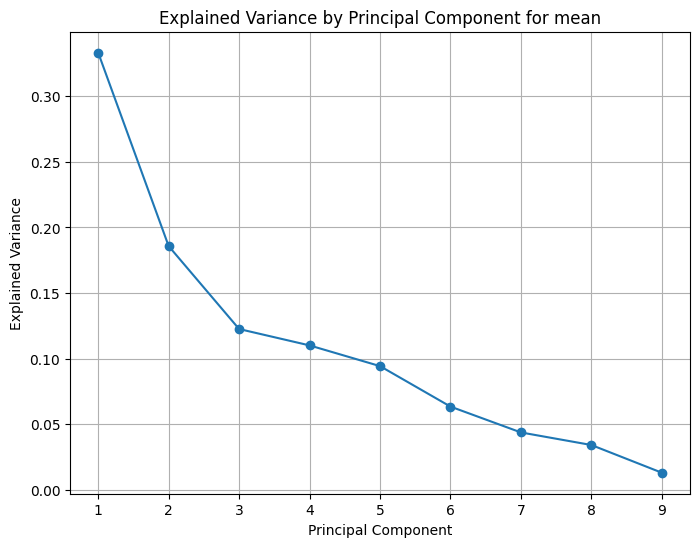

In [84]:
# Choose 4 based on more than 0.10
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_mean) + 1), explained_variance_mean, marker='o', linestyle='-')
plt.title('Explained Variance by Principal Component for mean')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

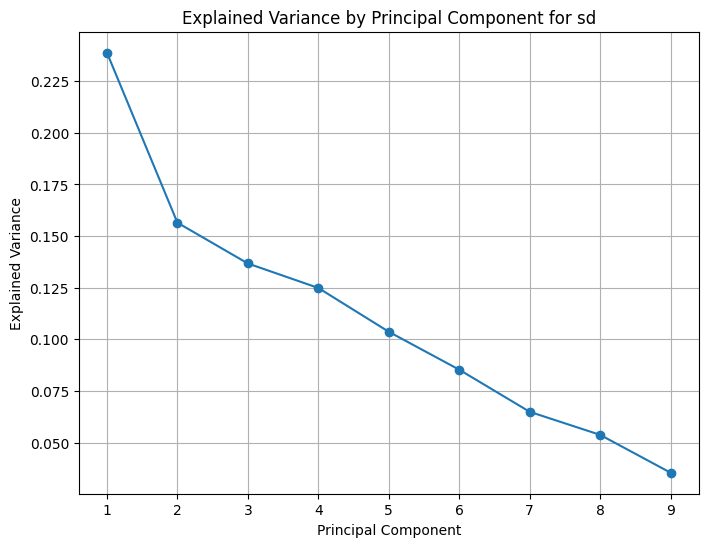

In [85]:
# Choose 5 based on more than 0.10
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_sd) + 1), explained_variance_sd, marker='o', linestyle='-')
plt.title('Explained Variance by Principal Component for sd')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

# Principal component analysis with number of components decided for each case based on plots
- For PCA of both mean and std together: 6 PCs
- For PCA on mean only: 4 PCs
- For PCA on std only : 6 PCs

In [127]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_columns)
scaled_data_mean = scaler.fit_transform(mean_columns)
scaled_data_sd = scaler.fit_transform(sd_columns)

# Update the n_components here to get how many principal components you want to use
pca_all = PCA(n_components=6)
pca_mean = PCA(n_components=4)
pca_sd = PCA(n_components=6)

# Fit the PCA model
pca_all.fit(scaled_data)
pca_mean.fit(scaled_data_mean)
pca_sd.fit(scaled_data_sd)

# Transform the data
reduced_data_all = pca_all.transform(scaled_data)
reduced_data_mean = pca_mean.transform(scaled_data_mean)
reduced_data_sd = pca_sd.transform(scaled_data_sd)

# Explained variance
explained_variance_all = pca_all.explained_variance_ratio_
explained_variance_mean = pca_mean.explained_variance_ratio_
explained_variance_sd = pca_sd.explained_variance_ratio_

## Merging of principal components in training data 

In [128]:
# Need to reset index of training data for concat
train_data = train_data.reset_index(drop=True)
# Converting reduced data sets from np.array into dataframe
reduced_all = pd.DataFrame(reduced_data_all)
reduced_all.columns = ["PC1","PC2","PC3","PC4","PC5","PC6"]
reduced_mean = pd.DataFrame(reduced_data_mean)
reduced_mean.columns = ["PC1m","PC2m","PC3m","PC4m"]
reduced_std = pd.DataFrame(reduced_data_sd)
reduced_std.columns = ["PC1s","PC2s","PC3s","PC4s","PC5s","PC6s"]

# Merging for Principal components that used both mean and std tgt
new_train_data_tgt = pd.concat([train_data,reduced_all],axis = 1)
new_train_data_tgt = new_train_data_tgt.drop(columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9'])
# Merging for Principal components that used mean and std separately
new_train_data_sep = pd.concat([train_data,reduced_mean],axis = 1)
new_train_data_sep = pd.concat([new_train_data_sep,reduced_std],axis = 1)
new_train_data_sep = new_train_data_sep.drop(columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9'])

In [122]:
# Sanity Check
new_train_data_tgt.head()
new_train_data_sep.head()


,gene_id,Transcript_ID,Position,label,Base_seq,PC1m,PC2m,PC3m,PC4m,PC1s,PC2s,PC3s,PC4s,PC5s,PC6s
0,ENSG00000004059,ENST00000000233,244,0,AAGACCA,2.745863,0.048319,-0.142728,0.066868,2.613460,0.207847,-0.572925,0.721853,-0.718214,-0.434759
1,ENSG00000004059,ENST00000000233,261,0,CAAACTG,-1.395621,-0.195111,1.337965,-0.685107,-0.250673,0.751076,0.332955,-0.519130,-0.416041,0.482546
2,ENSG00000004059,ENST00000000233,316,0,GAAACAG,-1.787675,-0.325734,0.632243,0.061908,-1.537677,-0.518765,-0.712981,-1.054358,-0.179635,-0.284206
3,ENSG00000004059,ENST00000000233,332,0,AGAACAT,-1.028029,2.738169,-0.800930,0.618056,-0.437836,0.193370,-0.087304,1.505729,1.346359,1.310832
4,ENSG00000004059,ENST00000000233,368,0,AGGACAA,2.637975,1.716605,1.754123,0.761242,0.509573,-0.767346,-1.937101,0.165017,0.805025,1.495517


## Conversion of test data into principal components and merging into test data

In [129]:
# Reset index for test data for concat
test_data = test_data.reset_index(drop=True)

# Converting the test data set into principal components from using mean and std tgt
reduced_test_all = pca_all.transform(test_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9']])
reduced_test_mean = pca_mean.transform(test_data[['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9']])
reduced_test_std = pca_sd.transform(test_data[['sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6',"sd7","sd8","sd9"]])

# Converting reduced data sets from np.array into dataframe
reduced_test_all = pd.DataFrame(reduced_test_all)
reduced_test_all.columns = ["PC1","PC2","PC3","PC4","PC5","PC6"]
reduced_test_mean = pd.DataFrame(reduced_test_mean)
reduced_test_mean.columns = ["PC1m","PC2m","PC3m","PC4m"]
reduced_test_std = pd.DataFrame(reduced_test_std)
reduced_test_std.columns = ["PC1s","PC2s","PC3s","PC4s","PC5s","PC6s"]

# Merging the columns
# Merging for Principal components that used both mean and std tgt
new_test_data_tgt = pd.concat([test_data,reduced_test_all],axis = 1)
new_test_data_tgt = new_test_data_tgt.drop(columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9'])
# Merging for Principal components that used mean and std separately
new_test_data_sep = pd.concat([test_data,reduced_test_mean],axis = 1)
new_test_data_sep = pd.concat([new_test_data_sep,reduced_test_std],axis = 1)
new_test_data_sep = new_test_data_sep.drop(columns = ['mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6','mean7','mean8','mean9','sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6','sd7','sd8','sd9'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [132]:
len(new_test_data_sep)
#len(test_data)

37592

In [133]:
new_train_data_tgt.to_csv("Train_data_tgt.csv")
new_test_data_tgt.to_csv("Test_data.tgt.csv")

new_train_data_sep.to_csv("Train_data_sep.csv")
new_test_data_sep.to_csv("Test_data_sep.csv")